# Intermediate Machine Learning: Assignment 4

**Deadline**

Assignment 4 is due Wednesday, April 27 by 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on Canvas).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on Canvas. You can also post questions or start discussions on Ed Discussion. The assignment may look long at first glance, but the problems are broken up into steps that should help you to make steady progress.

**Submission**

Submit your assignment as a pdf file on Gradescope, and as a notebook (.ipynb) on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to more easily find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:

Go to "File" at the top-left of your Jupyter Notebook
Under "Download as", select "HTML (.html)"
After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
From the print window, select the option to save as a .pdf

**Topics**

 * Graph kernels
 * Reinforcement learning
 * Recurrent neural networks

This assignment will also help to solidify your Python skills.

<!-- $\renewcommand{\reals}{{\mathbb R}}
\newcommand{\indp}{\perp\kern-4pt\perp}
\newcommand{\given}{\,|\,}
$ -->

## Problem 1: Graph kernels (10 points)

The graph Laplacian for a weighted graph on $n$ nodes is defined as

$$ L = D - W$$

where $W$ is an $n\times n$ symmetric matrix of positive edge weights,
with $W_{ij} = 0$ if $(i,j)$ is not an edge in the graph,
and $D$ is the diagonal matrix with $D_{ii} = \sum_{j=1}^n W_{ij}$.
This generalizes the definition of the Laplacian
used in class, where all of the edge weights are one.


1. Show that $L$ is a Mercer kernel, by showing that $L$ is
  symmetric and positive-semidefinite.
<br>

Answer:
We first show that $L$ is a symmetric matrix. As we have
\begin{align}
  L &= D - W \\
    &= D^T - W^T \\
    &= L^T.
\end{align}
For any vector $x=[x_1,...,x_n]^T$, we have
\begin{align}
  x^TLx &= \sum_{i=1}^n\left(x_i^2\sum_{j=1}^nW_{ij}-x_i\sum_{j=1}^nx_jW_{ji} \right) \\
        &= \sum_{i\neq j}(x_i-x_j)^2W_{ij} \\
        &\geq 0 
\end{align}
given $W_{ij}\geq 0$. Thus $L$ is a symmetric and positive-semidefinite matrix, which shows that $L$ is a Mercer kernel.

2. In graph neural networks we define polynomial filters of the form

  $$ P = a_0 I + a_1 L + a_2 L^2 + \cdots a_d L^d$$
  
  where $L$ is the Laplacian and $a_0,\ldots, a_d$ are parameters,
  corresponding to the filter parameters in standard convolutional
  neural networks.

  If each $a_i \geq 0$ is non-negative, show that $P$ is also
  a Mercer kernel. 
<br>

Answer: 
For each term in the polynomial, we have
\begin{align}
  x^Ta_iL^ix = 
  \begin{cases}
    a_i(xL^k)^TLxL^k\geq 0 & i=2k+1 \\
    a_i\|xL^k\|^2\geq 0 & i=2k
  \end{cases}
\end{align}
for any $x\in\mathbb{R}^n$. As each term in $P$ is symmetric as shown in (1), $P$ is a symmetric and positive semi-definite matrix, which is also a Mercer kernel.

3. Is positivity of the coefficients $a_i$ a necessary condition? Explain.

Answer: 
The positivity of the coefficients is not a necessary condition as we only need the sum of the quadratic term to be greater than zero for any $x$. The positivity of the coefficients $a_i$ is a sufficient condition.



##  Problem 2:  Positive reinforcement  (10 points)
<!-- $\def\J{{\mathcal J}}$
$\def\E{{\mathbb E}}$ -->

As discussed in class, reinforcement learning
using policy gradient methods is based on maximizing the
expected total reward

$$ \mathcal{J}(\theta) = \mathbb{E}_\theta [R(\tau)],$$

where the expectation is over the probability distribution over sequences $\tau$ through a choice of actions using the policy. This can be rewritten as

\begin{align*}
  \nabla_\theta \mathcal{J}(\theta) & = \mathbb{E}_\theta\left[ R(\tau) \nabla_\theta \log p(\tau\,|\, \theta) \right].
\end{align*}

Approximating this gradient involves computing $\nabla_\theta \log \pi_\theta (a\,|\, s)$ where $\pi_\theta$ is the policy.

Suppose that the action space is continuous
and $\pi_\theta(a\,|\, s)$ is a normal density with mean
$\mu_\theta(s)$ and variance $\sigma^2_\theta(s)$, two outputs of
a neural network with input $s$ and parameters $\theta$.

1. Suppose the outputs of the neural network are given by

\begin{align*}
  \mu_\theta(s) & = \beta_1^T h(s) \\
  \sigma^2_\theta(s) &= \text{sigmoid}(\beta_2^T h(s))
\end{align*}

where $h(s)$ is the vector of neurons in the last layer, immediately
before the outputs. Derive explicit expressions for
$\nabla_{\beta_1} \log \pi_\theta(a\,|\, s)$ and
$\nabla_{\beta_2} \log \pi_\theta(a\,|\, s)$.

Answer:
To compute the gradients, we first have
\begin{align}
  \log\pi_\theta(a|s) &= \log\frac{1}{\sqrt{2\pi}\sigma(s)}e^{-\frac{(a-\mu(s))^2}{2\sigma^2(s)}} \\
                      &= -\log\sqrt{2\pi}\sigma(s) - \frac{(a-\mu(s))^2}{2\sigma^2(s)}
\end{align}

and then we have
\begin{align}
  \nabla_{\beta_1}\log\pi_\theta(a|s) &= -\frac{\mu(s)-a}{\sigma^2(s)}\nabla_{\beta_1}\mu(s) \\
                                      &= -\frac{\mu(s)-a}{\sigma^2(s)}h(s) \\
                                      &= -\frac{\beta_1^T h(s)-a}{\text{sigmoid}(\beta_2^T h(s))}h(s)
\end{align}
\begin{align}
  \nabla_{\beta_2}\log\pi_\theta(a|s) &= \left(-\frac{1}{\sigma(s)} + \frac{(a-\mu(s))^2}{\sigma(s)^3} \right)\nabla_{\beta_2}\sigma(s) \\
                                      &= \left(-\frac{1}{\sigma(s)} + \frac{(a-\mu(s))^2}{\sigma(s)^3} \right)\sigma^2(s)h(s) \\
                                      &= \left(-\text{sigmoid}(\beta_2^T h(s)) + \frac{(a-\beta_1^T h(s))^2}{\text{sigmoid}(\beta_2^T h(s))} \right)h(s)
\end{align}
<br>

2. Explain how these gradients and other gradient
terms in $\nabla_\theta \log \pi_\theta(a\,|\, s)$ are used
to estimate the policy.

Answer:
We parameterize the policy as $\pi_\theta(a|s)$ and use the gradient ascent on the loss function to estimate the policy. As we can use the total expected reward as the loss, we have
\begin{align}
  \mathcal{L}(\theta) &= \mathbb{E}_\theta(R(\tau)) \\
                      &= \int p(\tau|\theta)R(\tau)d\tau.
\end{align}
From the lecture slides, we can approximate the gradient by
\begin{align}
  \nabla_\theta\mathcal{L}(\theta) &\approx \frac{1}{N}\sum_{i=1}^NR(\tau^{(i)})\nabla_\theta\log p(\tau^{(i)}|\theta) \\
                                   &= \frac{1}{N}\sum_{i=1}^NR(\tau^{(i)})\sum_{t=0}^T\nabla_\theta\log\pi_\theta(a_t^{(i)}|s_t^{(i)}).
\end{align}
The parameters of policy gradient are then updated iteratively by 
\begin{align}
  \theta \leftarrow \theta + \eta\hat{\nabla_\theta\mathcal{L}(\theta)}.
\end{align}

## Problem 3: Deep Q-Learning for Flappy Bird (25 points)

Deep Q-learning was proposed (and patented) by DeepMind and made 
a big splash when the same deep neural network architecture was shown to be able to surpass
human performance on many different Atari games, playing directly from the pixels.
In this problem, we will walk you through the implementation of deep Q-learning 
to learn to play the Flappy Bird game.

<img src="https://raw.githubusercontent.com/YData123/sds365-sp22/main/assignments/assn4/images/flappy_bird_demp.gif" width="144" height="256"/>

The implementation is based these references:
- [DeepLearningFlappyBird](https://github.com/yenchenlin/DeepLearningFlappyBird)
- [Deep Q-Learning for Atari Breakout](https://keras.io/examples/rl/deep_q_network_breakout/)

We use the `pygame` package to visualize the interaction between the algorithm 
and the game environment. 
However, _pygame_ is not well supported by Google Colab; 
we recommend you to run the code for this problem locally.
A window will be popped up that displays
the game as it progress in real-time (as for the Cartpole demo from class).

This problem is structured as follows:

* Load necessary packages
* Test the visualization of the game, to make sure everything's working
* Process the images to reduce the dimension
* Setup the game history buffer 
* Implement the core Q-learning function
* Run the learning algorithm
* Interpret the results



### Introduction

Please make sure that the following files are in the same place:
- assn4.ipynb
- wrapped_flappy_bird.py
- flappy_bird.utils.py
- assets

If you do use Google Colab, set `using_colab` to be *True* in the following cell.
If you access extra files through Google Drive, then uncomment the `'%cd ...'` 
line and change `PATH` to where you store the files on your Google Drive (need not to do this if you are using the temporary files for Colab).

In [4]:
import os
# from google.colab.patches import cv2_imshow
# from google.colab import output

from IPython import display

using_colab = True

if using_colab:
    os.environ["SDL_VIDEODRIVER"] = "dummy"
    # %cd /content/drive/MyDrive/PATH

The Flappy Bird game requires a few Python packages. Please install these _as soon as possible_, and notify us of any issues you experience so that we can help. 

In [5]:
# %pip install pygame
# %pip install opencv-python
import numpy as np
import cv2
import wrapped_flappy_bird as flappy_bird
from collections import deque
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers

pygame 2.1.2 (SDL 2.0.16, Python 3.6.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


### The Flappy Bird environment 

Interaction with the game environment is carried out through calls of the form

`(image, reward, terminal) = game.frame_step(action)`

where the meaning of these variables is as follows:

- `action`: $\binom{1}{0}$ for doing nothing, $\binom{0}{1}$ for "flapping the bird's wings"
- `image`: the image for the next step of the game, of size $(288, 512, 3)$ with three RGB channels
- `reward`: the reward received for taking the action; -1 if an obstacle is hit, 0.1 otherwise. 
- `terminal`: `True` if an obstacle is hit, otherwise `False`

Now let's take a look at the game interface.
First, initiate the game:

In [6]:
num_actions = 2

# initiate a game
game = flappy_bird.GameState()

# get the first state by doing nothing
do_nothing = np.zeros(num_actions)
do_nothing[0] = 1
image, reward, terminal = game.frame_step(do_nothing)

print('shape of image:', image.shape)
print('reward: ', reward)
print('terminal: ', terminal)

shape of image: (288, 512, 3)
reward:  0.1
terminal:  False


After (locally) running the above cells, a window should pop up, and you can watch the game being played in that window. 

Let's take some random actions and see what happens:

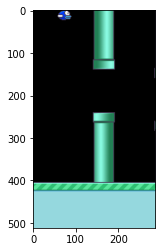

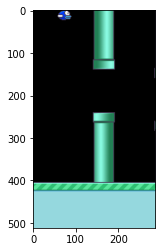

In [7]:
import matplotlib.pyplot as plt

for i in range(587):
    
    # choose a random action 
    action = np.random.choice(num_actions)
    
    # create the corresponding one-hot vector
    action_vec = np.zeros(num_actions)
    action_vec[action] = 1

    # take the action and observe the reward and the next state
    image, reward, terminal = game.frame_step(action_vec)

    # visualization on Colab
    if using_colab and i % 3 == 0:
        #  convert from (width, height, channel) to (height, width, channel)
        view = image.transpose([1, 0, 2])

        #  convert from rgb to bgr
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)

        #Display image, clear cell output
        plt.imshow(img_bgr)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        # plt.clf()
        # plt.imshow(img_bgr)
        # output.clear(wait=True)
        # cv2_imshow(img_bgr)

Are you able to see Flappy moving across the window and crashing into things? Great! If you're 
having any issues, post to EdD and we'll do our best to help you out.

Here is how we can visualize a frame of the game as an image within a cell.

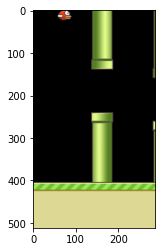

In [8]:
# show the image
import matplotlib.pyplot as plt
plt.imshow(image.transpose([1, 0, 2]))
plt.show()
plt.close()

### Preprocessing the images 

Alright, next we need to prepocess the images by converting them to grayscale and resizing them to $80\times 80$ pixels. This will help 
to reduce the computation, and aid learning. Besides, Flappy is 
"color blind." (Fun fact: The instructor of this course is also 
[color vision deficient](https://en.wikipedia.org/wiki/Color_blindness).)


Shape of the transformed image: (80, 80, 1)


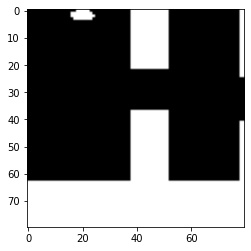

In [9]:
def resize_gray(frame):
    frame = cv2.cvtColor(cv2.resize(frame, (80, 80)), cv2.COLOR_BGR2GRAY)
    ret, frame = cv2.threshold(frame, 1, 255, cv2.THRESH_BINARY)
    return np.reshape(frame, (80, 80, 1))

image_transformed = resize_gray(image)
print('Shape of the transformed image:', image_transformed.shape)

# show the transformed image
_ = plt.imshow(image_transformed.transpose((1, 0, 2))[:, :, 0], cmap='gray')

This shows the preprocessed image for a single frame of
the game. In our implementation of Deep Q-Learning, we encode the state by stacking four consecutive frames, resulting in 
a tensor of shape (80,80,4). 

Then, given the `current_state`, and a raw image `image_raw`
of size $288\times512\times3$, we convert 
the raw image to a $80\times80\times 1$ grayscale image using the
code in the previous cell. The , 
we remove the first frame of `current_state` and add 
the new frame, giving again a stack of images of 
size (80, 80, 4).

In [10]:
def preprocess(image_raw, current_state=None):
    # resize and convert to grayscale
    image = resize_gray(image_raw)
    # stack the frames
    if current_state is None:
        state = np.concatenate((image, image, image, image), axis=2)
    else:
        state = np.concatenate((image, current_state[:, :, :3]), axis=2)
    return state

### 3.1 Explain the game state

Why is the state chosen to be a stack of four consecutive
frames rather than a single frame? Give an intuitive explanation.

Answer:
Using a stack of 4 frames as input will catch more temporal information such as the velocity and acceleration, which will be helpful for the network optimization.

###  Constructing the neural network

Now we are ready to construct the neural network for approximating the Q function. Recall that, given input $s$ which is of size $80\times80\times4$ due to the 
previous preprocessing, the output of the network should be of size 2, corresponding to the values of $Q(s,a_1)$ and $Q(s, a_2)$ respectively.

Here is the summary of the model we'd like to build:

<!-- ![Neural network](https://raw.githubusercontent.com/YData123/sds365-sp22/main/assignments/assn4/images/q_model.png) -->

### 3.2 Initialize the network

Complete the code in the next cell so that your model architecture matches that in the above picture. Here we specify the initialization of the weights by using `keras.initializers`.
Note that we haven't talked about the `strides` argument for CNNs; 
you can read about stride here: [https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/](https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/). It's not important to understand this in detail, you just need to choose the number and sizes of the filters to get the shapes to match the specification.


In [11]:
from tensorflow.keras import initializers
def create_q_model():
    state = layers.Input(shape=(80, 80, 4,))

    layer1 = layers.Conv2D(filters=32, kernel_size=5, strides=4, activation="relu",
                           kernel_initializer=initializers.TruncatedNormal(mean=0., stddev=0.01),
                           bias_initializer=initializers.Constant(0.01))(state)
    layer2 = layers.MaxPool2D(2, strides=2, padding="SAME")(layer1)
    layer3 = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation="relu", 
                           kernel_initializer=initializers.TruncatedNormal(mean=0., stddev=0.01),
                           bias_initializer=initializers.Constant(0.01))(layer2)
    layer4 = layers.Flatten()(layer3)
    q_value = layers.Dense(units=2, activation="linear", 
                           kernel_initializer=initializers.TruncatedNormal(mean=0., stddev=0.01),
                           bias_initializer=initializers.Constant(0.01))(layer4)

    return keras.Model(inputs=state, outputs=q_value)

Plot the model summary to make sure that the network is the same as expected. 

In [12]:
model = create_q_model()
print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 4)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 19, 19, 32)        3232      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
Total params: 23,778
Trainable params: 23,778
Non-trainable params: 0
__________________________________________________

### Deep Q-learning

We're now ready to implement the Q-learning algorithm.
There are some subtle details in the implementation that you need to sort out. First, recall that the update rule for Q learning is

$$Q(s,a) \leftarrow Q(s,a) + \alpha (r(s,a) + \gamma\cdot \max_{a'} Q(\text{next}(s,a), a') - Q(s,a))$$

where $\gamma$ is the discount factor and $\alpha$ can be viewed as the step size or learning rate for gradient ascent.

We'll set these as follows:

In [13]:
gamma = 0.99            # decay rate of past observations
step_size = 1e-4        # step size

### Estimation with experience replay

At the beginning of training, we spend 10,000 steps taking random 
actions, as a means of observing the environment. 

We build a replay memory of length 10,000 steps, and every time we update the weights of the network, we sample a batch of size 32 and perform a Q-learning update on this batch.

After we have collected 10,000 steps of new data, we discard 
the old data, and replace it with the new "experiences."


In [14]:
observe = 10000            # timesteps to observe before training
replay_memory = 10000      # number of previous transitions to remember
batch_size = 32            # size of each batch


### 3.3 Justify the data collection

Why does it make sense to maintain the replay memory of a fixed size 
instead of including all of the historical data?


Answer:
Including all of the historical data will result in a significant amount of memory usage as the training progresses. The historical data very long time ago might also have little influence on the current training scheme. 

### Exploration vs exploitation

When performing Q-learning, we face the tradeoff between exploration and 
exploitation.  To encourage exploration, a simple strategy is to take a random action at each step with certain probability.

More precisely, for each time step $t$ and state $s_t$, with probability $\epsilon$, the algorithm takes a random action (wing flap or do nothing), and with probability $1-\epsilon$ the 
algorithm takes a greedy action according to $a_t = \arg\max_{a} Q_\theta(s_t,a)$. Here $\theta$ refers to the parameters of our CNN.

In [15]:
# value of epsilon
epsilon = 0.1

### 3.4 Complete the Q-learning algorithm

Next you will need to complete the Q-learning algorithm by filling in the missing code in the following function.
The missing parts include

- Taking a greedy action
- Given a batch of samples $\{(s_t, a_t, r_t, s_{t+1}, \text{terminal}_t)\}_{t\in B}$, computing the corresponding $Q_\theta(s_t, a_t)$.
- Given a batch of samples $\{(s_t, a_t, r_t, s_{t+1}, \text{terminal}_t)\}_{t\in B}$, computing the corresponding updated Q-values 
  
$$\hat{y}(s_t,a_t) = \begin{cases}
r_t + \gamma\, \max_{a} Q_\theta(s_{t+1}, a), & \text{if } \text{terminal}_t=0,\\
r_t, & \text{otherwise}.
\end{cases}$$

Then, the mean squared error loss for the batch is

$$\frac{1}{|B|} \sum_{t\in B} (\hat y(s_t, a_t) - Q_\theta(s_t, a_t))^2.$$



In [18]:
def dql_flappy_bird(model, optimizer, loss_function):

    # initiate a game
    game = flappy_bird.GameState()

    # store the previous state, action and transitions
    history_data = deque()

    # get the first observation by doing nothing and preprocess the image
    do_nothing = np.zeros(num_actions)
    do_nothing[0] = 1
    image, reward, terminal = game.frame_step(do_nothing)

    # preprocess to get the state
    current_state = preprocess(image_raw=image)
    
    # training
    t = 0

    while t < 50000:
        if epsilon > np.random.rand(1)[0]:
            # random action
            action = np.random.choice(num_actions)
        else:
            # compute the Q function
            current_state_tensor = tf.convert_to_tensor(current_state)
            current_state_tensor = tf.expand_dims(current_state_tensor, 0)
            q_value = model(current_state_tensor, training=False)
            
            # greedy action
            #-----MISSING-----# 
            # your code here
            action = np.argmax(q_value[0])
            #-----------------#

        # take the action and observe the reward and the next state
        action_vec = np.zeros([num_actions])
        action_vec[action] = 1
        image_raw, reward, terminal = game.frame_step(action_vec)
        next_state = preprocess(current_state=current_state, 
                                image_raw=image_raw)
        
        # store the observation
        history_data.append((current_state, action, reward, next_state, 
                            terminal))
        if len(history_data) > replay_memory:
            history_data.popleft()  # discard old data

        # train if done observing
        if t > observe:

            # sample a batch
            batch = random.sample(history_data, batch_size)
            state_sample = np.array([d[0] for d in batch]) # (32, 80, 80, 4)
            action_sample = np.array([d[1] for d in batch]) # (32,)
            reward_sample = np.array([d[2] for d in batch]) # (32,)
            state_next_sample = np.array([d[3] for d in batch]) # (32, 80, 80, 4)
            terminal_sample = np.array([d[4] for d in batch]) # (32,)

            # compute the updated Q-values for the samples
            #-----MISSING-----#
            # your code here
            # print(state_sample)
            # print(state_sample.shape)
            # print(action_sample.shape)
            # print(reward_sample.shape)
            # print(state_next_sample.shape)
            # print(terminal_sample.shape)

            updated_q_value_list = []
            for i in range(batch_size):
                if terminal_sample[i]:
                    updated_q_value_list.append(reward_sample[i])
                else:
                    current_q_table = model(state_next_sample, training=False)
                    updated_q_value_list.append(reward_sample[i] + gamma*np.max(current_q_table[i]))

            updated_q_value = tf.convert_to_tensor(updated_q_value_list)
            # print(updated_q_value)
            #-----------------#

            # train the model on the states and updated Q-values
            with tf.GradientTape() as tape:
                # compute the current Q-values for the samples
                #-----MISSING-----#
                # your code here
                current_q_table = model(state_sample, training=False)
                current_q_value = tf.convert_to_tensor([current_q_table[i, action_sample[i]] for i in range(batch_size)])
                # print(current_q_value)
                #-----------------#

                # compute the loss
                loss = loss_function(updated_q_value, current_q_value)

            # backpropagation
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
        else:
            loss = 0

        # update current state and counter
        current_state = next_state
        t += 1

        # print info every 500 steps
        if using_colab and t % 500 == 0: # previous every 3 steps
            view = image_raw.transpose([1, 0, 2])
            img_bgr = cv2. cvtColor(view, cv2.COLOR_RGB2BGR)

            display.clear_output(wait=True)
            # output.clear(wait=True)
            print(f"STEP {t} | PHASE {'observe' if t<=observe else 'train'}", 
                  f"| ACTION {action} | REWARD {reward} | LOSS {loss}")
            plt.imshow(img_bgr)
            display.display(plt.gcf())
            # cv2_imshow(img_bgr)
        elif t % 500 == 0:
            print(f"STEP {t} | PHASE {'observe' if t<=observe else 'train'}", 
                  f"| ACTION {action} | REWARD {reward} | LOSS {loss}")

You're now ready to play the game! Just run the cell below; do not change the code.

In [19]:
def playgame(start_from_ckpt=False, ckpt_path=None):

    #! DO NOT change the random seed !
    np.random.seed(4)

    if start_from_ckpt:
        # if you want to start from a checkpoint
        model = keras.models.load_model('ckpt_path')
    else:
        model = create_q_model()

    # specify the optimizer and loss function
    optimizer = keras.optimizers.Adam(learning_rate=step_size, clipnorm=1.0)
    loss_function = keras.losses.MeanSquaredError()

    # play the game
    dql_flappy_bird(model=model, optimizer=optimizer, loss_function=loss_function)

STEP 50000 | PHASE train | ACTION 0 | REWARD 0.1 | LOSS 0.09207262098789215


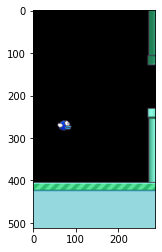

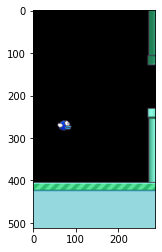

In [20]:
playgame()

### 3.5 Describe the training

Describe what you see by answering the following questions:

- In the early stage of training (within 2,000 steps in the *explore* phase), 
  describe the behavior of the Flappy Bird. What do you think is the greedy policy 
  given by the estimation of the Q-function in this stage?
- Describe what you see after roughly 5,000 training steps. 
  Do you see any improvement?
  In particular, compare Flappy's behavior with their behavior in the early stages of 
  training.
- Explain why the performance has improved, by relating to the model 
  design such as the replay memory and the exploration.

Answer;
- In the early stage of the training, the flappy bird crashes frequently. The greedy policy given by the estimation of the Q-function seems to be a random policy.
- After roughly 5000 training steps, there are some improvement. The bird seems to be able to avoid some obstacles and the episode seems to be longer.
- As in the early stage, the content in the replay buffer is mostly constructed in the observation stage. As the training progresses, the model is able to exploit and explore following the epsilon-greedy policy.

It takes a long time to fully train the network, so you're not required to 
complete the training. Here's a [video](https://www.youtube.com/watch?v=THhUXIhjkCM) showing the performance of a well trained DQN.

## Problem 4: Julius Tensor (15 points)

In this problem you will modify a basic vanilla "np-complete" implementation of recurrent neural networks, and evaluate some pre-trained RNNs trained on the plays of 
William Shakespeare.



In [1]:
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)


In [2]:
def generate_shakespeare(model, size=1000, seed='ROMEO:'):
    states = None
    next_char = tf.constant([seed])
    result = [next_char]
                             
    for n in range(1000):
      next_char, states = model.generate_one_step(next_char, states=states)
      result.append(next_char)

    return tf.strings.join(result)[0].numpy().decode("utf-8")
                             

### Problem 4.1: Word play

We have upload three pre-trained models for you to experiment with: 'Hamlet', 'Macbeth', and 'Comedy of Errors'. One of the models has 256 hidden neurons in the GRU layer, and was trained
for 30 epochs. The two other models each have have 1024 hidden neurons in the GRU layer; one was trained for 30 epochs, and the other trained for 50 epochs. 

Generate sample text from each, using the function `generate_shakespeare` defined above, in order to evaluate the models. Which model is which? Explain how you made your assessment.

You can download the models 'Hamlet', 'Comedy_of_Errors' and 'Macbeth' from 
https://github.com/YData123/sds365-sp22/tree/main/assignments/assn4.

Note: If you are unable to load and run these models on your own computer, please run 
them in the cloud on Colab.


In [ ]:
import zipfile
def func_unzip(path_to_zip_file, directory_to_extract_to):
    with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
        zip_ref.extractall(directory_to_extract_to)

func_unzip('Hamlet.zip','Hamlet_unzip')
func_unzip('Comedy_of_Errors.zip','Comedy_of_Errors_unzip')
func_unzip('Macbeth.zip','Macbeth_unzip')

In [ ]:
pretrained1 = tf.saved_model.load('./Hamlet_unzip/Hamlet')
pretrained2 = tf.saved_model.load('./Comedy_of_Errors_unzip/Comedy_of_Errors')
pretrained3 = tf.saved_model.load('./Macbeth_unzip/Macbeth')

In [ ]:
# Your code and markdown here 
generate_shakespeare(pretrained1)

"ROMEO:\nThe news I have my cousin, she you make\nnone. Lay her father, boy; the more\nShall bear their very watch your face to weep:\nBut passing with a double och an appreheth ear\nWas much, but consumed with his brazen jace.\n\nRICHARD:\nAre it confirmn your highness' mouth:\nTherefore I came unto myself: if it be\nnone affended, how it lies your life, for if\nhe seeming him, which never be sportful:\nWas gratifuely entering me?\n\nLUCIO:\n'Tis but the last,\nStand by a puppet of me. Tybalt thanks, nay, my\ntood bide an enemy, faintly speak,\nNor I lest choose him for my either corpedet\nTo have you assist them. Now to London citizens\nHath the stone raised with armies in arms.\n\nANTONIO:\nThat so strays the strength of murderers.\n\nANGELO:\nBelieve me, sir?\n\nPROSPERO:\nFor what, provide!\n\nKATHARINA:\nI will be satisfied.\n\nPAULINA:\nTraitors!\nGo thou to Friar Lador, Sirrah!\n\nTRANIO:\nIn this same very pretty one hath life\nA kinsman nature? were there you assign, not in m

In [ ]:
generate_shakespeare(pretrained2)

"ROMEO:\nTell me that you shall call me that hear\nThe time hath wit or pains within my foxted. If Irelo!\n\nKING RICHARD III:\nFaithiest merry of this open wits,\nAnd Menening thou envy stand, ere I this angel\nDake miseray'd by Parter that should keep me deed,\nYond faged, and all the glorious stately: have you may find\nFirst Romeo: but I will his courtesy.\n\nHASTINGS:\nYe'? after sweet in this resive.\nFly, Rickond, and strange youth--\n\nGroe I'll give as he had; for any heavine\nThe world was he o' the owa, frowns more may hath wife,\nThat makes the one harve thee for his queen, I\ndaught the flournewing of her.\n\nDUKE OF YORK:\nSent for a foultiers for that made the city;\nFeveren. O my what they give it o'erf:\nAppeak thy trull joys were royal fool\nThat wondrous rank earsh of deature\nThan more than you are their land.\n\nEDWARD:\nThe napkerech you, Henry purges on my heart:\nThere lies: dishonour; you but that your heads;\nAnd have the bastard Elikent on only son:\nOur shee

In [ ]:
generate_shakespeare(pretrained3)

"ROMEO:\nI do beseech you, I mean now; the forten years\n'done Tybrazia, for I have been a\ncounterfeitful virgin: keep with you; who,\nthey have a king King Richard and matter.\n\nJULIET:\nThat ill beseech you, who is this ang again?\nNow fair an irrooation bears me up,\nAnd long to when I saw in these nobles were\nFrom your isconsidence and unfold.\n\nDUKE OF YORK:\nIf that have done this true affacious in the city,\nFlier fettle issue of this world.\n\nThird York:\nHave affected my heart my writ. Piop, my business in rebellike\nA king of end, but forrow I give love,\nGo thwire angers, for I thank\nthee, noble Welshmely gazed me: thou\nart a shamp-well corn, obey eyes: believe thee want, if\nyou will follow thee. Come, you are happy,\nAnd do not break our common wealth, as she art\nWith down, her hors' excalled o' the rest,\nAnd fly to demosit them all.\n\nLUCIO:\nCall doth my lesson?\n\nANTONIO:\nWent them to Aufidius,\nDo not be were dishonour'd to bedward;\nYou must return again i

Answer: 
The first pretrained model might be the one with 1024 hidden neurons trained with 50 epochs. I feel like the punctuation is more consistent than the other two and the grammar is better. The second pretrained model might be the one with 256 hidden neurons trained 30 epochs given the worst grammar and quite inconsistent sentences. The last pretrained model might te one with 1024 hidden neurons trained with 30 epochs as it seems a little bit worse than the first generated model. 


### Problem 4.2: np-complete implementation of RNNs

Run the [basic rnn code](https://github.com/YData123/sds365-sp22/blob/main/assignments/assn4/shakespeare_rnn.py) from [Andrej Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/) to train a model on the [Shakespeare data](https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt). 
Modify the code however you see fit, for example, by changing how often a snippet of synthetic text is generated.

* How many steps of gradient descent did you train for? How many characters of Shakespeare data was processed during training? How long did the training take?

* Did you modify the code in any way? If so, how?

* Provide a few examples of generated text from your trained model.

* How do the generated samples compare to those generated
in Problem 4.1?

* Describe at least three differences between this vanilla RNN model
and the GRU networks that you experimented with in 4.1, which are described [here](https://www.tensorflow.org/text/tutorials/text_generation).

Note: To limit the output the graders need to examine, please experiment in a separate Python session, and only include your final results in this notebook.


In [ ]:
# Your code and markdown here 
!python shakespeare_rnn.py

Answer:
- I performed 30000 steps of gradient descent. There are 1115394 characters of Shakespeare data that were processed in the training. The training took about 4 minutes and 30 seconds.
- I didn't modify the code.
- Here are few examples 
    -   ivey ofr whranes, hew,
        Hossaimess;
        And what od brote?
        Thit prond.
        GORSI ERCAGR, IN HI:
        O ark!
        Thy noal Dewill as rovet stay rid I pisenuch my my fzote thy staus him cameil mo frepars
        I ware badyorwe
    -   UKES:
        The ckamirk IDcionce:
        Teen't awispfe'd mr hotht aw.
        Lhather monive lood is ay mae be cextom!
        The ADand orlat nously do sionh
        Utht a I, a gricaniegers cobyol grossins toover rened so mu'd ore, y 
- The generated text is worse than those generated in problem 4.1 as most words are incorrect.
- Here are the differences:
    - The number of hidden neurons is larger in 4.1 model and thus its generative capacity is larger.
    - The model in 4.1 involves a trainable embedding layer to extract the features of the raw text.
    - The GRU model in 4.1 addresses the vanishing gradient issue in the vanilla RNN.

### Problem 4.3: Adding a layer 

Now suppose you wish to add another recurrent hidden layer to the np-complete RNN implementation. Rather than implementing the full model training, 
we'd like you to implement the generator. (But we encourage you to at least partially implement the full training of the two-layer model.)



Here is the generator for the model that has a single recurrent layer:

In [ ]:
def sample(h, seed_ix, n):
    """
    sample a sequence of integers from the model
    h is memory state, seed_ix is a seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []
    for t in range(n):
        h = np.tanh(np.dot(Wxh, x) + np.dot(Whh, h) + bh)
        y = np.dot(Why, h) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)
        
    return ixes

Your job is to rewrite this function for a model that has two hidden recurrent layers.
Complete the implementation below.

In [ ]:
def sample2(h1, h2, seed_ix, n):
    """
    sample a sequence of integers from the model
    h1, h2 is memory state, seed_ix is a seed letter for first time step
    """
    x = np.zeros((vocab_size, 1))
    x[seed_ix] = 1
    ixes = []
    for t in range(n):
        h1 = np.tanh(np.dot(Wxh1, x) + np.dot(Whh1, h1) + bh1)
        h2 = np.tanh(np.dot(Wh1h2, h1) + np.dot(Whh2, h2) + bh2)
        y = np.dot(Why, h2) + by
        p = np.exp(y) / np.sum(np.exp(y))
        ix = np.random.choice(range(vocab_size), p=p.ravel())
        x = np.zeros((vocab_size, 1))
        x[ix] = 1
        ixes.append(ix)

    return ixes

Explain your implementation, by giving a description of each line of the code.

Answer:
Only the first three lines are different from the previous example. 
1. By adding another hidden layer, we first compute the updated state h1 from the current input (Wxh1), previous memory (Whh1) and the bias term.
2. We then compute the updated second hidden state from the previous hidden state input (Wh1h2), previous memory (Whh2) and the bias term.
3. We finally compute the output value using the second hidden state

### Problem 4.4 Be the Bard (optional, 2 points EC)

Starting from the [TensorFlow tutorial](https://www.tensorflow.org/text/tutorials/text_generation), train the best model 
that you can, generating synthetic Shakespeare that is better than the best model
from problem 4.1 above. 

* Describe how the model is indeed better than the best model in 4.1.
* Provide details on how you trained the model, and any changes made to the model 
architecture.
* So that you do not add too much stuff to your notebook, put your code in a separate notebook (submitted to Canvas), and only add Markdown below to detail your results.

Answer:
- The model seems to be more capable than the model in 4.1 The generated text seems to be more consistent and the punctuation seems to be more reasonable.
- The model contains an embedding layer, a single GRU layer with 2048 units followed by a fully connected layer. We utilize the Adam optimizer with sparse categorical cross entropy loss on the model.
- The code used in this problem is titled as "p4.ipynb" and submitted in canvas.